### CS4102 - Geometric Foundations of Data Analysis I
Prof. Götz Pfeiffer<br />
School of Mathematical and Statistical Sciences<br />
University of Galway

# Week 7

##  Face Recognition

* Start by importing `numpy` and `matplotlib` colormaps.

In [4]:
import numpy as np
import matplotlib.cm as cm

* Assume that the face database has been downloaded and unpacked in the folder `orl_faces`.

In [5]:
root = "orl_faces"

In [6]:
!tree {root}

orl_faces
├── README
├── s1
│   ├── 10.pgm
│   ├── 1.pgm
│   ├── 2.pgm
│   ├── 3.pgm
│   ├── 4.pgm
│   ├── 5.pgm
│   ├── 6.pgm
│   ├── 7.pgm
│   ├── 8.pgm
│   └── 9.pgm
├── s10
│   ├── 10.pgm
│   ├── 1.pgm
│   ├── 2.pgm
│   ├── 3.pgm
│   ├── 4.pgm
│   ├── 5.pgm
│   ├── 6.pgm
│   ├── 7.pgm
│   ├── 8.pgm
│   └── 9.pgm
├── s11
│   ├── 10.pgm
│   ├── 1.pgm
│   ├── 2.pgm
│   ├── 3.pgm
│   ├── 4.pgm
│   ├── 5.pgm
│   ├── 6.pgm
│   ├── 7.pgm
│   ├── 8.pgm
│   └── 9.pgm
├── s12
│   ├── 10.pgm
│   ├── 1.pgm
│   ├── 2.pgm
│   ├── 3.pgm
│   ├── 4.pgm
│   ├── 5.pgm
│   ├── 6.pgm
│   ├── 7.pgm
│   ├── 8.pgm
│   └── 9.pgm
├── s13
│   ├── 10.pgm
│   ├── 1.pgm
│   ├── 2.pgm
│   ├── 3.pgm
│   ├── 4.pgm
│   ├── 5.pgm
│   ├── 6.pgm
│   ├── 7.pgm
│   ├── 8.pgm
│   └── 9.pgm
├── s14
│   ├── 10.pgm
│   ├── 1.pgm
│   ├── 2.pgm
│   ├── 3.pgm
│   ├── 4.pgm
│   ├── 5.pgm
│   ├── 6.pgm
│   ├── 7.pgm
│   ├── 8.pgm
│   └── 9.pgm
├── s15
│   ├── 10.pgm
│   ├── 1.pgm
│   ├── 2.pgm
│   ├── 3.pgm
│   ├── 4.pgm
│   ├──

* In order to read these data into the python session, we need two things:
    * access to the filesytem hierarchy
    * image processing 

* The `os` library provides tools for navigating the filesystem. 
* The `os.walk` function traverses the directory stucture recursively, and distinguishes between files and subfolders.

In [7]:
import os
folders = next(os.walk(root))[1]
folders[:10]

['s14', 's28', 's25', 's38', 's29', 's31', 's6', 's40', 's12', 's17']

* `os.path.join` constructs pathnames
* `os.listdir` lists a directory's content

In [8]:
names = os.listdir(os.path.join(root, folders[0]))
names[:7]

['4.pgm', '1.pgm', '8.pgm', '9.pgm', '3.pgm', '10.pgm', '5.pgm']

In [9]:
path = os.path.join(root, folders[8], names[6])
path

'orl_faces/s12/5.pgm'

* The Python Imaging Library (`PIL`) adds image processing capabilities to your Python interpreter.

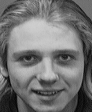

In [10]:
from PIL import Image
im = Image.open(path)
im

* `numpy` knows how to convert an image into an array.

In [44]:
ar = np.array(im)
ar

array([[114, 109, 112, ..., 117, 109, 111],
       [113, 109, 112, ..., 111, 111, 111],
       [109, 110, 111, ..., 113, 109, 113],
       ...,
       [ 38,  33,  30, ...,  42,  32,  31],
       [ 35,  26,  35, ...,  34,  47,  42],
       [ 24,  30,  38, ...,  37,  35,  38]], dtype=uint8)

In [49]:
ar.size

10304

* `matplotlib.pyplot` can display an array as an image.

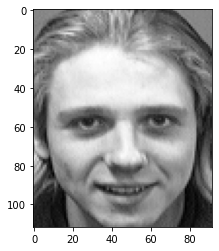

In [15]:
import matplotlib.pyplot as plt
plt.imshow(ar, cmap=cm.gray)

* And `Image` can convert the array back into an image.

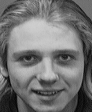

In [16]:
im = Image.fromarray(ar)
im

* How to read the images: this function uses the above tools to read all images into an array `X`.  The list `y` keeps track of the people whose faces are on the images.

In [17]:
def read_images(root):
    c = 0
    X, y = [], []
    for folder in next(os.walk(root))[1]:
        for name in os.listdir(os.path.join(root, folder)):
            path = os.path.join(root, folder, name)
            im = Image.open(path)
            X.append(np.array(im))
            y.append(c)
        c += 1
    return np.array(X), y

* So we read the images and look into `X`

In [18]:
X, y = read_images(root)

In [19]:
X.shape

(400, 112, 92)

In [20]:
X[1]

array([[ 50,  49,  50, ...,  41,  42,  38],
       [ 55,  46,  50, ...,  39,  39,  36],
       [ 50,  49,  49, ...,  37,  42,  38],
       ...,
       [183, 165, 145, ..., 118, 114, 105],
       [133, 148, 155, ..., 120, 118, 116],
       [144, 150, 169, ..., 159, 111, 117]], dtype=uint8)

* `X` is a list of $400$ images of $112 \times 92$ pixels.   For PCA, we prefer this to be a list of vectors,
  i.e. a $400 \times (112 \cdot 92)$ matrix.

In [21]:
X.reshape((X.shape[0], -1))

array([[ 44,  48,  51, ..., 129, 131, 125],
       [ 50,  49,  50, ..., 159, 111, 117],
       [ 51,  46,  48, ..., 196, 173, 110],
       ...,
       [ 86,  89,  90, ..., 124, 116,  83],
       [ 88,  97,  95, ...,  67,  68,  69],
       [ 95,  89,  89, ...,  43,  55,  55]], dtype=uint8)

* How to do PCA: This function performs PCA on a given $n \times d$-matrix `X`.
* Numpy's `linalg.eigh` function computes the eigenvalues and eigenvectors of a real symmetric matrix.
* Note that the eigenvectors will form the **columns** of the resulting matrix `evectors`.
* Also note how the calculation distinguishes between cases $n > d$ or not. (This trick is explained in the original notes.)

In [22]:
def pca(X):
    n, d = X.shape
    mu = X.mean(axis=0)
    X = X - mu
    if n > d:
        C = X.T @ X
        evalues, evectors = np.linalg.eigh(C)
    else:
        C = X @ X.T
        evalues, evectors = np.linalg.eigh(C)
        evectors = X.T @ evectors
        for i in range(n):
            evectors[:,i] = evectors[:,i]/np.linalg.norm(evectors[:,i])

    # sort evectors descending by their evalue
    idx = np.argsort(-evalues)
    evalues = evalues[idx]
    evectors = evectors[:,idx]

    return evalues, evectors, mu

* We can now perform a full pca and obtain a (sorted) list of eigenvalues `D`, a matrix `W` of eigenvectors (as its columns), and the average `mu` of the rows of `X` (which is needed later on).

In [23]:
D, W, mu = pca(X.reshape((X.shape[0], -1)))

In [24]:
D[:16]

array([1.12674012e+09, 8.25826045e+08, 4.37721410e+08, 3.56966463e+08,
       3.26955753e+08, 2.15150394e+08, 1.56582921e+08, 1.49152236e+08,
       1.25550735e+08, 1.15350204e+08, 9.20689493e+07, 8.94455177e+07,
       7.16013547e+07, 6.82891139e+07, 6.23624153e+07, 5.84579637e+07])

In [25]:
W.shape

(10304, 400)

In [26]:
mu

array([85.6175, 85.5775, 85.925 , ..., 76.87  , 75.865 , 75.2275])

* Up to some reshaping and normalization, the eigenvectors can now be regarded as images: eigenfaces

In [27]:
W[:,5].reshape(X[0].shape)

array([[-0.00246411, -0.00181415, -0.00183699, ..., -0.00371973,
        -0.0035014 , -0.00353363],
       [-0.00230831, -0.00158184, -0.00199381, ..., -0.00339319,
        -0.00348311, -0.00331448],
       [-0.00193779, -0.00181334, -0.00167895, ..., -0.00319211,
        -0.00360301, -0.00353526],
       ...,
       [ 0.02169714,  0.02250182,  0.0224621 , ...,  0.00791064,
         0.00677242,  0.00637152],
       [ 0.02223916,  0.02266741,  0.02262731, ...,  0.0078965 ,
         0.00662179,  0.00689983],
       [ 0.02185065,  0.02182901,  0.02166027, ...,  0.00663778,
         0.00669865,  0.00598205]])

* The float entries of this $112 \times 92$ matrix version of the eigenvector in column $5$ need to be
  rescaled to become integers in `range(256)`, suitable for images.
* This is done by the following function.

In [28]:
def normalize(X, low, high, dtype=None):
    minX, maxX = np.min(X), np.max(X)

    # normalize to [0...1].	
    X = X - float(minX)
    X = X / float(maxX - minX)

    # scale to [low...high].
    X = X * (high-low)
    X = X + low

    if dtype is None:
        return X
    return np.array(X, dtype=dtype)

* Let's see the effect on eignevector number $5$.

In [29]:
normalize(W[:,5], 0, 255, np.uint8).reshape(X[0].shape)

array([[ 97, 100, 100, ...,  91,  92,  91],
       [ 97, 101,  99, ...,  92,  92,  93],
       [ 99, 100, 100, ...,  93,  91,  91],
       ...,
       [214, 218, 218, ..., 147, 142, 140],
       [217, 219, 219, ..., 147, 141, 142],
       [215, 215, 214, ..., 141, 141, 138]], dtype=uint8)

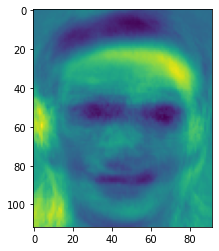

In [30]:
plt.imshow(normalize(W[:,5], 0, 255, np.uint8).reshape(X[0].shape))

* Let's turn the first (at most) 16 eigenvectors into grayscale images (note: eigenvectors are stored by column!) and plot them in a single picture.

In [31]:
E = []
for i in range(min(W.shape[1], 16)):
    e = normalize(W[:,i], 0, 255, np.uint8)
    E.append(e.reshape(X[0].shape))

* How to plot (details omitted)

In [32]:
def subplot(title, images, rows, cols, sptitle="subplot", sptitles=[], colormap=cm.gray, filename=None):
    fig = plt.figure()

    # main title
    fig.text(.5, .95, title, horizontalalignment='center')

    for i in range(len(images)):
        fig.add_subplot(rows, cols, i+1)
        if len(sptitles) == len(images):
            plt.title("%s #%s" % (sptitle, str(sptitles[i])), { 'fontsize': 8 })
        else:
            plt.title("%s #%d" % (sptitle, i+1), { 'fontsize': 8 })
        plt.imshow(np.asarray(images[i]), cmap=colormap)
        plt.axis('off')

    if filename is None:
        plt.show()
    else:
        fig.savefig(filename)


* Let's plot the $16$ eigenfaces using a coloured colormap (and store the plot to "python_eigenfaces.pdf").

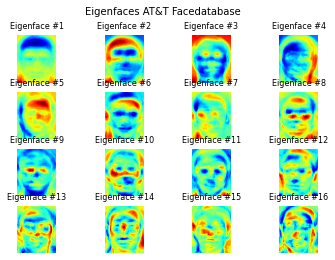

In [37]:
subplot(
    title="Eigenfaces AT&T Facedatabase", 
    images=E, 
    rows=4, cols=4, 
    sptitle="Eigenface", 
    colormap=cm.jet, 
    filename="python_pca_eigenfaces.pdf"
)

* Finally, we project a face into the small space generated by only a few eigenvectors, and then try and reconstruct the face from that information.
* The formulas for projection and reconstruction  are straightforward. 

* How to project

In [38]:
def project(W, X, mu):
    return (X - mu) @ W

* How to reconstruct

In [39]:
def reconstruct(W, Y, mu):
    return Y @ W.T + mu

* Let's apply this to face number $21$, projected onto the first $50$ eigenvectors.

In [40]:
P = project(W[:,:50], X[21].reshape(-1), mu)
P

array([ -436.86658322, -1106.20847756,   949.38784936,  -701.91218722,
         112.40812903,  1480.97561199,   500.28711041,   -99.92674454,
         221.73194312,   274.27934907,   369.23474349,   -28.74576041,
        -149.76214943,   474.29574685,   256.72668465,    32.14664537,
         -64.66560383,  -364.07007828,  -355.225784  ,   -68.51519877,
         -37.26400271,  -520.65750676,    81.91009574,   213.32855813,
         102.88691533,    85.36085367,    23.76028185,   124.225969  ,
         167.00869608,   398.04997502,   188.04897477,    54.83588176,
         105.51359883,  -103.09830736,   407.27395648,   159.43268872,
           6.24048797,   -30.4051735 ,   -60.02283575,  -100.89123755,
         -90.39512814,  -142.3650969 ,   102.93908749,  -228.72256101,
        -325.70012539,   126.96418073,  -107.01258496,  -164.96597046,
         115.49162429,   -91.12475608])

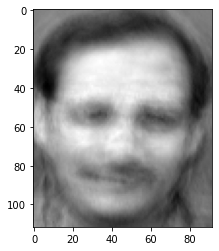

In [41]:
R = reconstruct(W[:,:50], P, mu)
plt.imshow(R.reshape(X[0].shape), cmap=cm.gray)

* How does the quality improve over range of numbers or eigenvectors?

In [42]:
steps = range(10, min(len(X), 320), 20)
E = []
for step in steps:
    P = project(W[:,:step], X[21].reshape(-1), mu)
    R = reconstruct(W[:,:step], P, mu).reshape(X[0].shape)
    E.append(normalize(R, 0, 255, dtype=np.uint8))

* plot them and store the plot to "python_reconstruction.pdf"

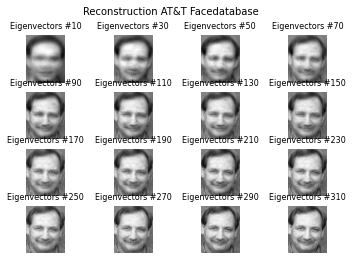

In [43]:
subplot(
    title="Reconstruction AT&T Facedatabase", 
    images=E, 
    rows=4, cols=4, 
    sptitle="Eigenvectors", 
    sptitles=steps, 
    colormap=cm.gray, 
    filename="python_pca_reconstruction.pdf"
)